# Comparacion entre ICA y FCA

Se evaluan ambos metodos en las mismas tareas para comparar desempeño.

Al parecer ICA funciona mejor con ruido uniforme, y FCA con ruido normal

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from scipy.stats import ortho_group

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

In [2]:
from BSS import Mezcla_imagenes, ICA_imagen, FCA, unmixing_error

In [3]:
# cargar la imagen en blanco y negro
ruta_imagen = "../Images/cat2.jpg"
imagen_original = io.imread(ruta_imagen, as_gray = True)

# reducir la resolución 
factor_reduccion = 0.3
nuevo_ancho = int(imagen_original.shape[1] * factor_reduccion)  
nuevo_alto = int(imagen_original.shape[0] * factor_reduccion)   
imagen_gato = transform.resize(imagen_original, (nuevo_alto, nuevo_ancho), anti_aliasing=True)

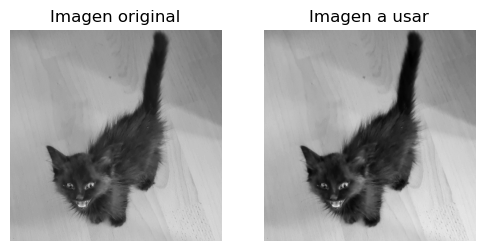

Dimensiones de la imagen a usar: (431, 431)


In [4]:
# ver la origianl y la que voy a usar
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
# original
ax[0].imshow(imagen_original, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Imagen original')
# x1
ax[1].imshow(imagen_gato, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Imagen a usar')
plt.show()

# ver dimensiones
print("Dimensiones de la imagen a usar:", imagen_gato.shape)

In [5]:
# la primera señal es la imagen
x1 = imagen_gato

In [6]:
# delimitar la matriz de mezcla
A = np.array([[np.sqrt(2)/2,  np.sqrt(2)/2],
              [-np.sqrt(2)/2, np.sqrt(2)/2]])

A

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

## Ruido Uniforme

Dimensiones de la señal x2: (431, 431)


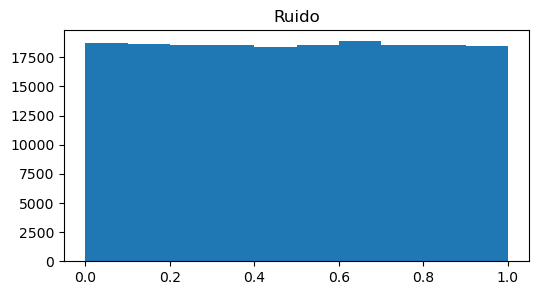

In [7]:
# hacer la segunda señal, ruido
x2 = np.random.rand(x1.shape[0], x1.shape[1]) # ruido uniforme
print("Dimensiones de la señal x2:", x2.shape)

# juntar las señales 
señales_originales_x = [x1, x2]

# ver 
plt.figure(figsize = (6, 3))
plt.hist(x2.flatten())
plt.title("Ruido")
plt.show()

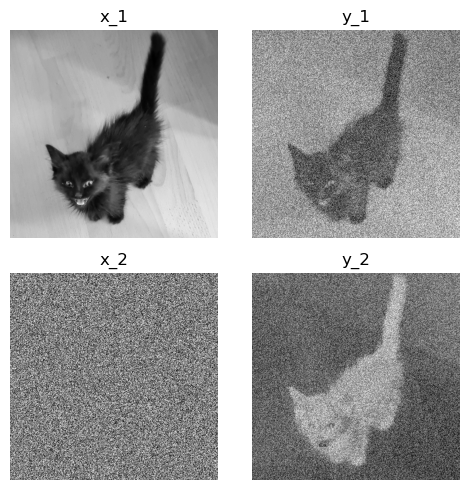

In [8]:
# hacer el objeto de mezcla
mezcla = Mezcla_imagenes(señales_originales_x, A)
# obtener las señales y resultado de la mezcla
señales_y = mezcla.mezclar_señales()
# ver
mezcla.ver_mezcla(figsize = (5, 5))

### Separar la imagen normal

C:\Users\diego\anaconda3\envs\ds\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


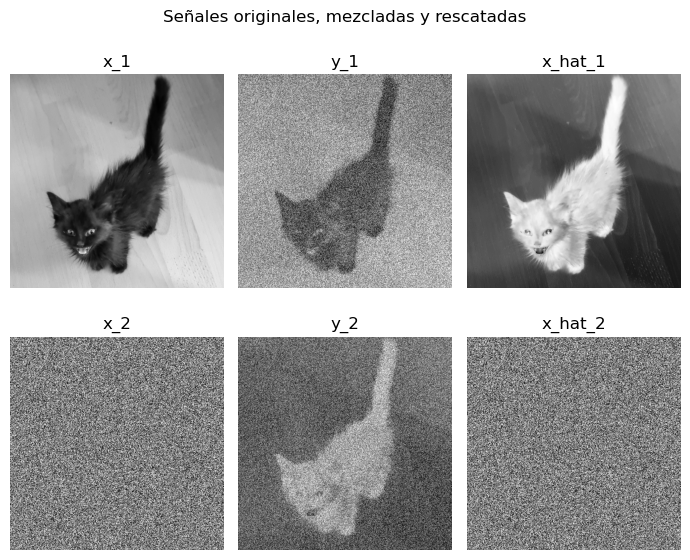

In [9]:
# ejecutar ICA
ica = ICA_imagen(señales_y)
x_hat = ica.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)

# ver error
error_ica = unmixing_error(A, ica.A_hat)
# ver el resultado
ica.ver(señales_x_originales = señales_originales_x, figsize = (7, 6))

C:\Users\diego\anaconda3\envs\ds\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


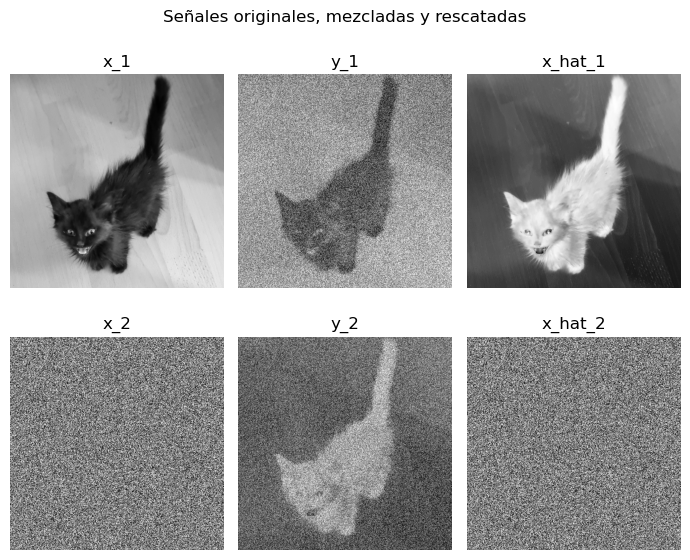

In [10]:
# ejecutar FCA
fca = FCA(señales_y)
x_hat = fca.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)

# ver error
error_fca = unmixing_error(A, fca.A_hat)

# ver el resultado
ica.ver(señales_x_originales = señales_originales_x, figsize = (7, 6))

In [11]:
# ver errores
print(f"Error de estimacion ICA (ruido uniforme): {error_ica}")
print(f"Error de estimacion FCA (ruido uniforme): {error_fca}")

Error de estimacion ICA (ruido uniforme): 0.0019735643401683324
Error de estimacion FCA (ruido uniforme): 0.7085176653200171


### Separar una muestra de la imagen

In [12]:
# obtener los indices a usar
N_side = 500
N = N_side**2
idx_muestra = np.random.randint(x1.shape[0], size=(N, 2))

In [13]:
# sacar los valores de cada imagen, y poner en forma cuadrada

# x1
x1_sample = x1[idx_muestra[:, 0], idx_muestra[:, 1]]
x1_sample = x1_sample.reshape(N_side, N_side)
# x2
x2_sample = x2[idx_muestra[:, 0], idx_muestra[:, 1]]
x2_sample = x2_sample.reshape(N_side, N_side)
# juntar las señales 
señales_originales_x_sample = [x1_sample, x2_sample]
# mezclar
mezcla = Mezcla_imagenes(señales_originales_x_sample, A)
señales_y_sample = mezcla.mezclar_señales()

In [14]:
# ejecutar ICA
ica = ICA_imagen(señales_y_sample)
x_hat = ica.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)
# ver error
error_ica = unmixing_error(A, ica.A_hat)

In [15]:
# ejecutar FCA
fca = FCA(señales_y_sample)
x_hat = fca.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)
# ver error
error_fca = unmixing_error(A, fca.A_hat)

In [16]:
# ver errores
print(f"Error de estimacion ICA (ruido uniforme): {error_ica}")
print(f"Error de estimacion FCA (ruido uniforme): {error_fca}")

Error de estimacion ICA (ruido uniforme): 0.0016336734579621244
Error de estimacion FCA (ruido uniforme): 0.7366134171726596


## Ruido Normal

Dimensiones de la señal x2: (431, 431)


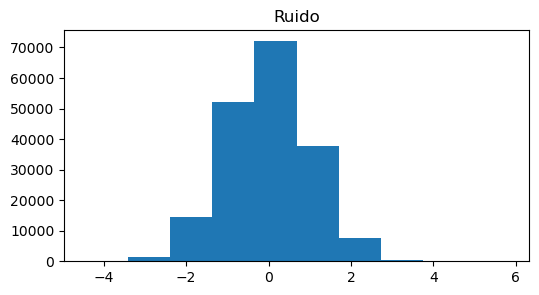

In [17]:
# hacer la segunda señal, ruido
x2 = np.random.randn(x1.shape[0], x1.shape[1]) # ruido normal
print("Dimensiones de la señal x2:", x2.shape)

# juntar las señales 
señales_originales_x = [x1, x2]

# ver 
plt.figure(figsize = (6, 3))
plt.hist(x2.flatten())
plt.title("Ruido")
plt.show()

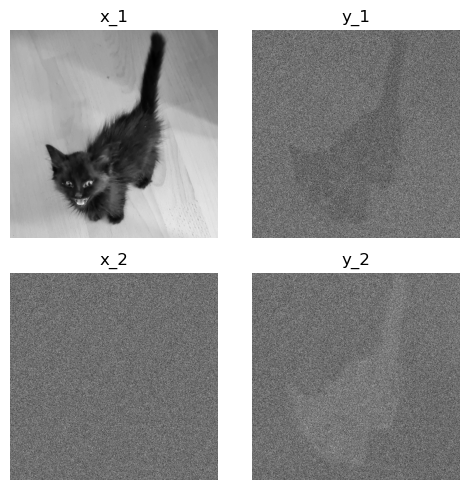

In [18]:
# hacer el objeto de mezcla
mezcla = Mezcla_imagenes(señales_originales_x, A)
# obtener las señales y resultado de la mezcla
señales_y = mezcla.mezclar_señales()
# ver
mezcla.ver_mezcla(figsize = (5, 5))

### Separar la imagen normal

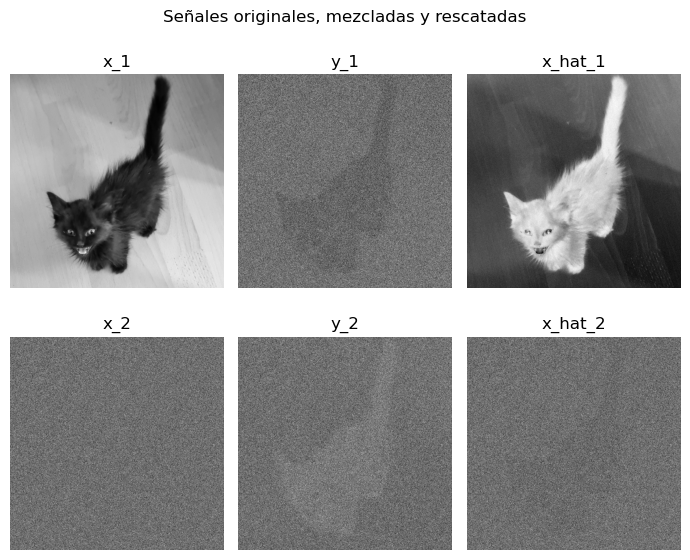

In [19]:
# ejecutar ICA
ica = ICA_imagen(señales_y)
x_hat = ica.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)

# ver error
error_ica = unmixing_error(A, ica.A_hat)
# ver el resultado
ica.ver(señales_x_originales = señales_originales_x, figsize = (7, 6))

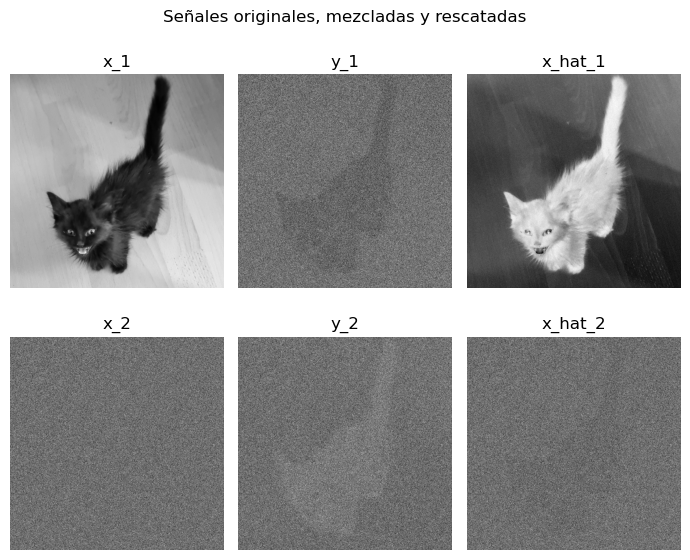

In [20]:
# ejecutar FCA
fca = FCA(señales_y)
x_hat = fca.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)

# ver error
error_fca = unmixing_error(A, fca.A_hat)

# ver el resultado
ica.ver(señales_x_originales = señales_originales_x, figsize = (7, 6))

In [21]:
# ver errores
print(f"Error de estimacion ICA (ruido normal): {error_ica}")
print(f"Error de estimacion FCA (ruido normal): {error_fca}")

Error de estimacion ICA (ruido normal): 0.3501731498124447
Error de estimacion FCA (ruido normal): 0.0007743225516028695


### Separar una muestra de la imagen

In [22]:
# obtener los indices a usar
N_side = 500
N = N_side**2
idx_muestra = np.random.randint(x1.shape[0], size=(N, 2))

In [23]:
# sacar los valores de cada imagen, y poner en forma cuadrada

# x1
x1_sample = x1[idx_muestra[:, 0], idx_muestra[:, 1]]
x1_sample = x1_sample.reshape(N_side, N_side)
# x2
x2_sample = x2[idx_muestra[:, 0], idx_muestra[:, 1]]
x2_sample = x2_sample.reshape(N_side, N_side)
# juntar las señales 
señales_originales_x_sample = [x1_sample, x2_sample]
# mezclar
mezcla = Mezcla_imagenes(señales_originales_x_sample, A)
señales_y_sample = mezcla.mezclar_señales()

In [24]:
# ejecutar ICA
ica = ICA_imagen(señales_y_sample)
x_hat = ica.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)
# ver error
error_ica = unmixing_error(A, ica.A_hat)

In [25]:
# ejecutar FCA
fca = FCA(señales_y_sample)
x_hat = fca.separar_señaes(repeticiones_optimizacion = 5, iniciar_W_ortogonal = False)
# ver error
error_fca = unmixing_error(A, fca.A_hat)

In [26]:
# ver errores
print(f"Error de estimacion ICA (ruido normal): {error_ica}")
print(f"Error de estimacion FCA (ruido normal): {error_fca}")

Error de estimacion ICA (ruido normal): 0.21146251620621778
Error de estimacion FCA (ruido normal): 0.0019503313590969217
